In [25]:
from codes.networkPA import generate_network_PA
from codes.simulatePA import diffuse_behavior_PA

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
G_all = generate_network_PA(level_f='./', label='all')

###############################################################
Graph generation starting!
Label: all
Formula: None
###############################################################

Create connections...
Nodes after connections: # 906
Edges created #:  9154

Create agents...
PA
gender
age
class
env
Removing nodes not in the specified classes...
Nodes removed for not being in the selected classes: # 455
Nodes remaining after removal: # 451
Edges remaining after removal #:  6065
###############################################################
Graph generated successfuly!
###############################################################



In [5]:
diffuse_behavior_PA(G_all, years=1, thres_PA=0.2, I_PA=0.00075)

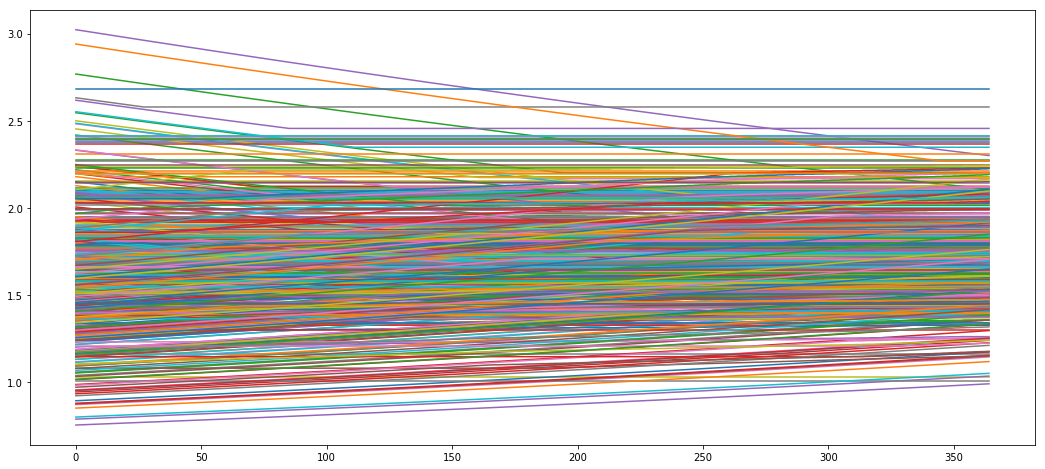

In [21]:
plt.figure(figsize=((18,8)))
for node in G_all.nodes():
    plt.plot(G_all.nodes[node]['PA_hist'])

In [22]:
PA_results = {}
for node in G_all.nodes():
    PA_results[node] = G_all.nodes[node]['PA_hist']

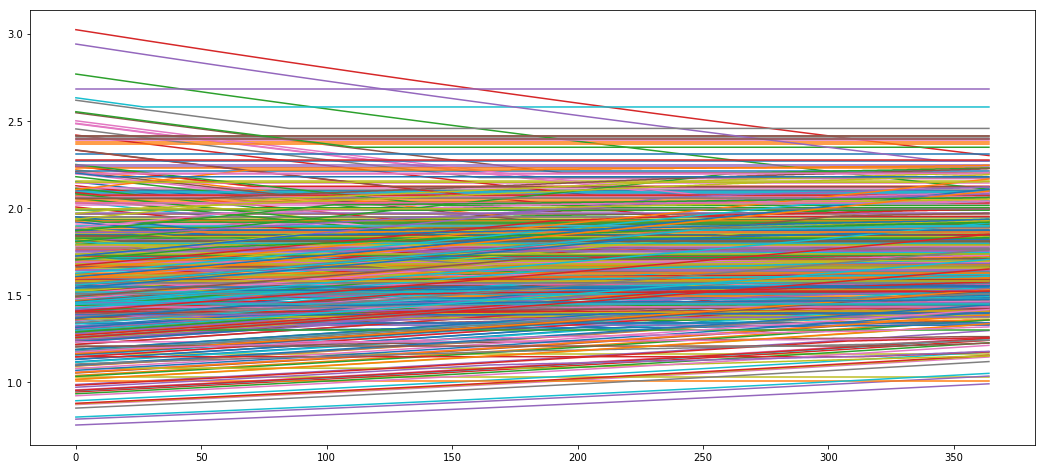

In [31]:
pd.DataFrame(PA_results).plot(legend=False, figsize=((18,8)))

In [33]:
# Create a dictionary. Keys are the classes, and the values are list of students
class_list = [67, 71, 72, 74, 77, 78, 79, 81, 83, 86, 100, 101, 103, 121, 
              122, 125, 126, 127, 129, 130, 131, 133, 135, 136, 138, 139]

class_dictionary = {}
for c in class_list:
    class_dictionary[c] = []

for node, key in G_all.nodes.data('class'):
    class_dictionary[int(key)].append(node)

# Get the subgraph for each cluster
graphs_all_list = {}

for c in class_list:
    graphs_all_list[c] = G_all.subgraph(class_dictionary[c])

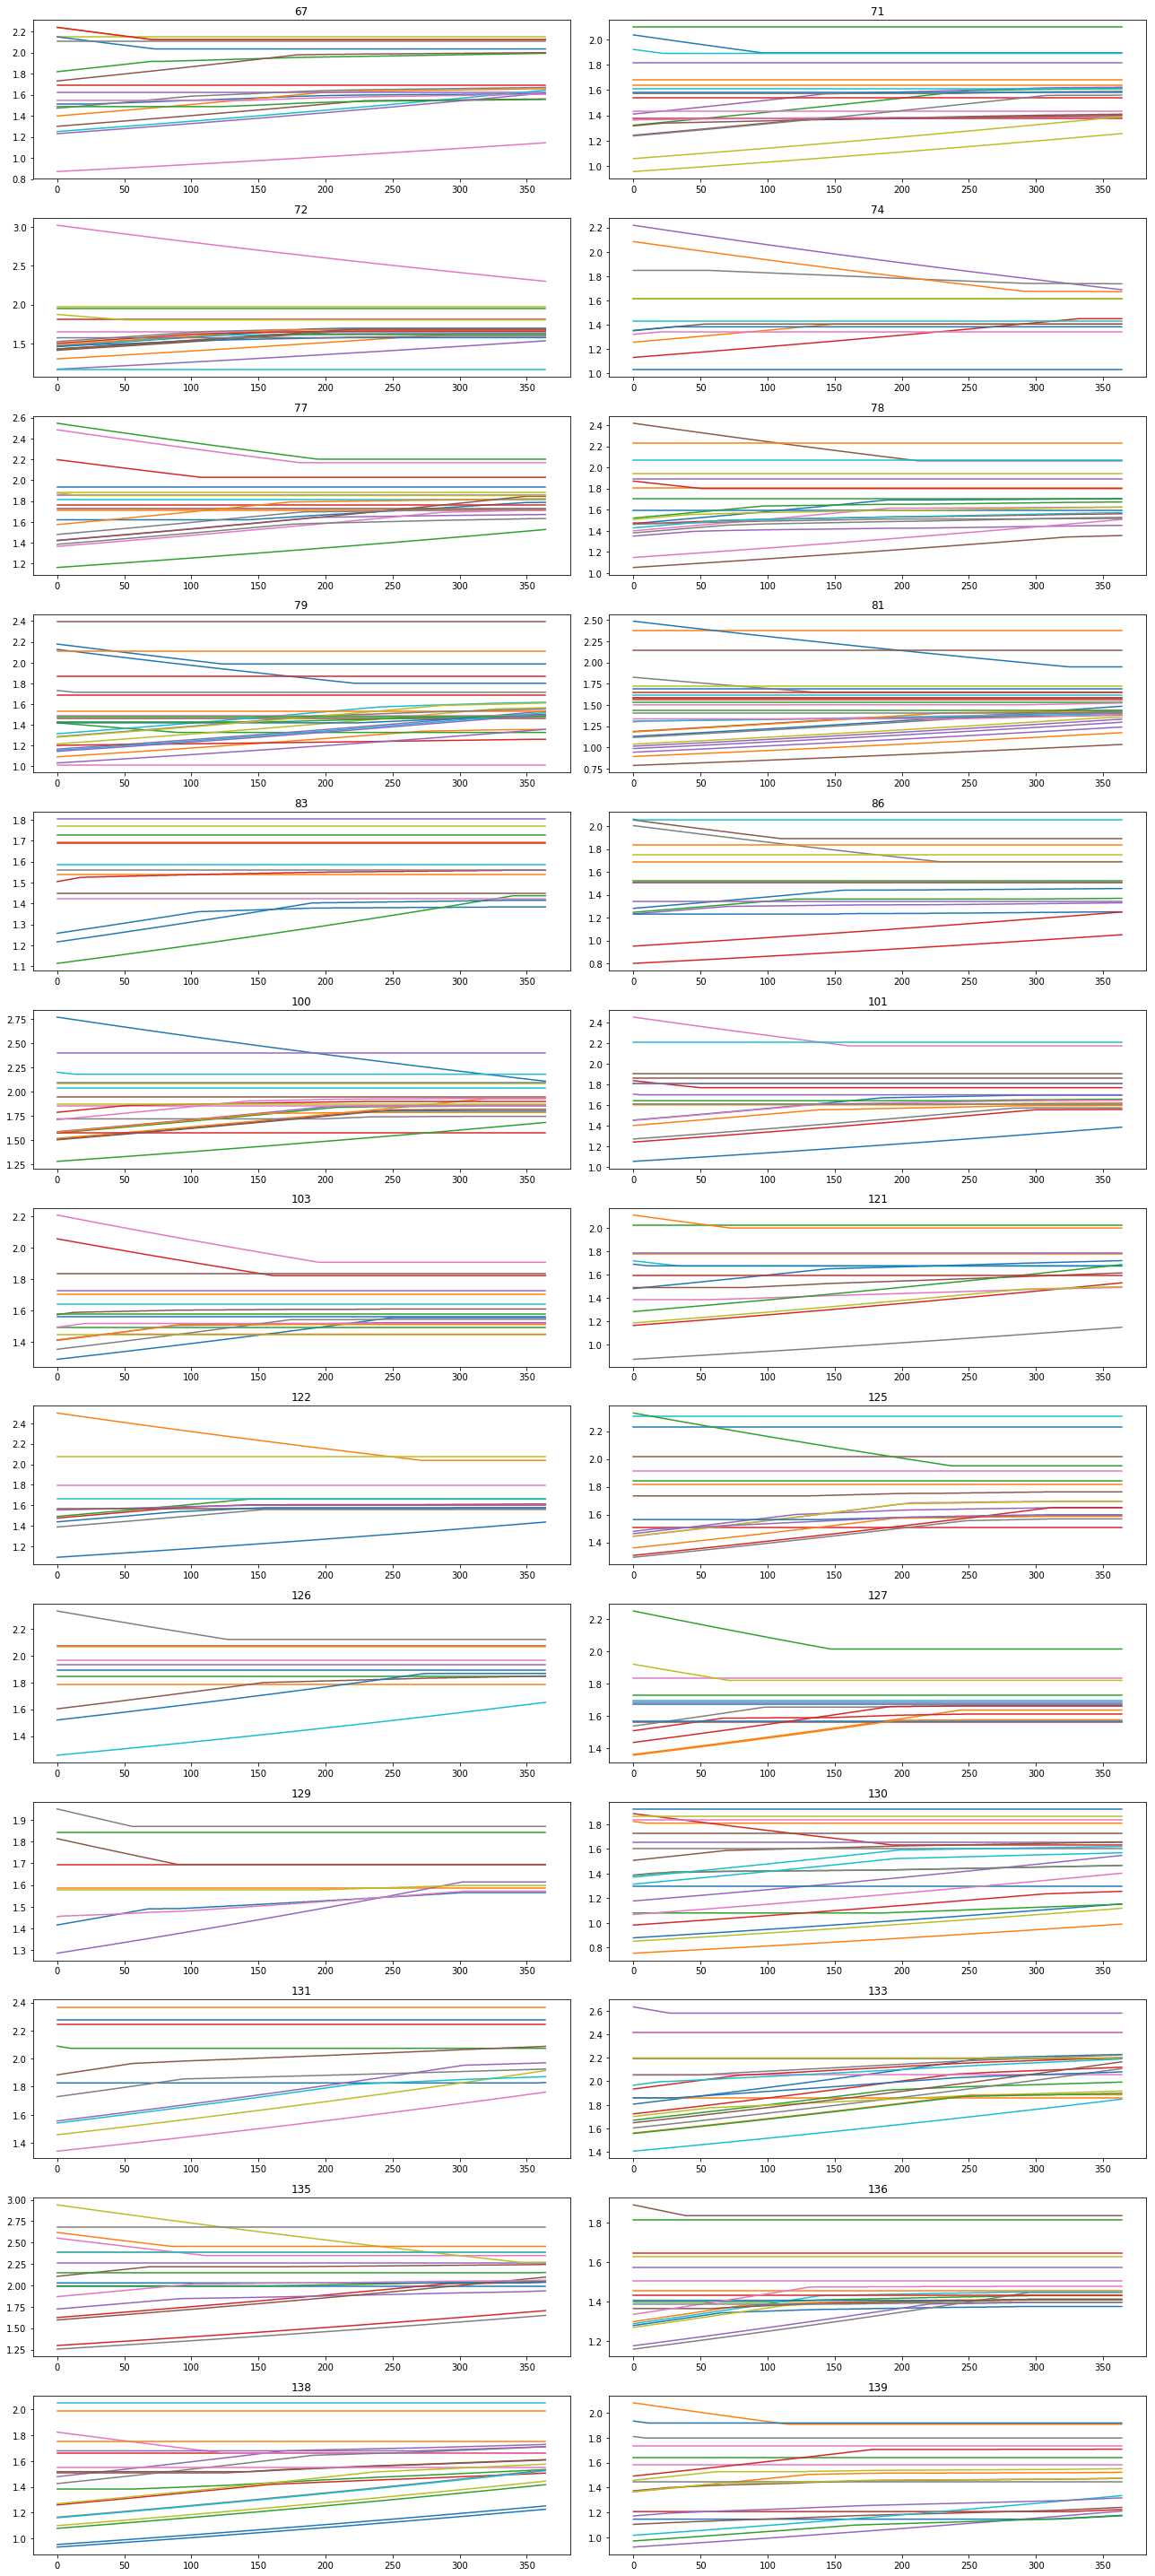

In [45]:
plt.figure(figsize=((18,40)))
i=1
for cl in class_list:
    plt.subplot(13,2,i)
    i = i+1
    g = graphs_all_list[cl]
    for node in g.nodes():
        plt.title(cl)
        plt.plot(g.nodes[node]['PA_hist'])
plt.tight_layout()